
Please load the file ex2data2.txt...



Saving ex2data2.txt to ex2data2.txt


<Figure size 432x288 with 0 Axes>

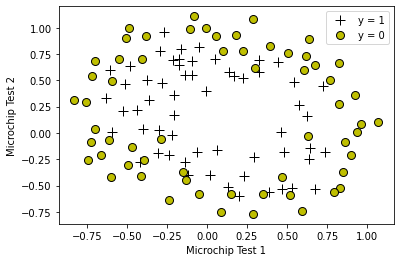


Cost at initial theta (zeros): 0.6931471805599454
Expected cost (approx): 0.693

Gradient at initial theta (zeros) - first five values only:

['0.0085', '0.0188', '0.0001', '0.0503', '0.0115']

Expected gradients (approx) - first five values only:

 0.0085
 0.0188
 0.0001
 0.0503
 0.0115


Program paused. Press enter to continue.


Cost at test theta (with lambda = 10): 3.2068822129709416
Expected cost (approx): 3.16

Gradient at test theta - first five values only:

[0.34604507 0.16135192 0.19479576 0.22686278 0.09218568]

Expected gradients (approx) - first five values only:

 0.3460
 0.1614
 0.1948
 0.2269
 0.0922


Program paused. Press enter to continue.



<Figure size 432x288 with 0 Axes>


lambda = 1


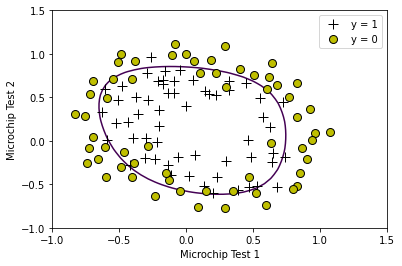


Train Accuracy: 83.05084745762711
Expected accuracy (with lambda = 1): 83.1 (approx)



In [1]:
## Machine Learning Online Class - Exercise 2: Logistic Regression
#
#  Instructions
#  ------------
#
#  This file contains code that helps you get started on the second part
#  of the exercise which covers regularization with logistic regression.
#
#  You will need to complete the following functions in this exericse:
#
#     sigmoid.m
#     costFunction.m
#     predict.m
#     costFunctionReg.m
#
#  For this exercise, you will not need to change any code in this file,
#  or any other files other than those mentioned above.
#

## Initialization
#clear ; close all; clc
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import optimize





def predict(theta, X):
#PREDICT Predict whether the label is 0 or 1 using learned logistic 
#regression parameters theta
#   p = PREDICT(theta, X) computes the predictions for X using a 
#   threshold at 0.5 (i.e., if sigmoid(theta'*x) >= 0.5, predict 1)

  m = np.size(X, 1) # Number of training examples
# You need to return the following variables correctly
  p = np.zeros((1,m))

# ====================== YOUR CODE HERE ======================
# Instructions: Complete the following code to make predictions using
#               your learned logistic regression parameters. 
#               You should set p to a vector of 0's and 1's
#

  p = ((sigmoid(np.dot(theta,X.T)))>=0.5)
  return p
                                    
# =========================================================================


def plotData(X, y):
#PLOTDATA Plots the data points X and y into a new figure 
#   PLOTDATA(x,y) plots the data points with + for the positive examples
#   and o for the negative examples. X is assumed to be a Mx2 matrix.

# Create New Figure
  fig = plt.figure() 
  plt.show()

# ====================== YOUR CODE HERE ======================
# Instructions: Plot the positive and negative examples on a
#               2D plot, using the option 'k+' for the positive
#               examples and 'ko' for the negative examples.
#
#pos = find(y==1);neg = find( y == 0); #in octave

# Find Indices of Positive and Negative Examples
  pos = y == 1
  neg = y == 0

# Plot Examples
  plt.plot(X[0,pos], X[1,pos], 'k+', lw=2, ms=10)
  plt.plot(X[0,neg], X[1,neg], 'ko', mfc='y', ms=8, mec='k', mew=1)
  
# =========================================================================


def mapFeature(X1, X2):
# MAPFEATURE Feature mapping function to polynomial features
#
#   MAPFEATURE(X1, X2) maps the two input features
#   to quadratic features used in the regularization exercise.
#
#   Returns a new feature array with more features, comprising of 
#   X1, X2, X1.^2, X2.^2, X1*X2, X1*X2.^2, etc..
#
#   Inputs X1, X2 must be the same size
#
# takes in a column of n- x1's, a column of n- x2s, and builds
# a n- x 28-dim matrix of features


  degree = 6

  out = np.ones( (X1.shape[0], 1) )
 
  for i in range(1,degree+1):
    for j in range(0,i+1):
      poly1 = X1 ** (i-j)
      poly2 = X2 ** (j)
      polynomial_feature  = (poly1 * poly2).reshape( poly1.shape[0], 1 ) 
      out   = np.hstack(( out, polynomial_feature ))
  return out
# =============================================================

def costFunctionReg(theta, X, y, lamb):
#   COSTFUNCTIONREG Compute cost and gradient for logistic regression with regularization
#   J = COSTFUNCTIONREG(theta, X, y, lambda) computes the cost of using
#   theta as the parameter for regularized logistic regression and the
#   gradient of the cost w.r.t. to the parameters. 

# Initialize some useful values
  m = len(y) # number of training examples

# You need to return the following variables correctly 
  J = 0
  grad = np.zeros(theta.shape)
# ====================== YOUR CODE HERE ======================
# Instructions: Compute the cost of a particular choice of theta.
#               You should set J to the cost.
#               Compute the partial derivatives and set grad to the partial
#               derivatives of the cost w.r.t. each parameter in theta

# We want the regularization to exclude the bias feature, so we can set theta(1) to zero
# or change the whole vector theta1 = [0 ; theta(2:size(theta), :)];
  
  h = sigmoid(np.dot(theta,X.T))

  J  = (1/m)*(np.sum(-y.dot(np.log(h)) - (1-y).dot(np.log(1-h)))) + (lamb/ (2 * m)) * np.sum(np.square(theta))
  grad = (1/m)*(h-y).dot(X)
  #grad = grad + (lamb/m)*theta
  grad[1:] = grad[1:]+(lamb/m)*theta[1:]
  return J,grad
# =============================================================


def sigmoid(z):
#   SIGMOID Compute sigmoid function
#   g = SIGMOID(z) computes the sigmoid of z.

# You need to return the following variables correctly 
  g = np.zeros((z.size))

# ====================== YOUR CODE HERE ======================
# Instructions: Compute the sigmoid of each value of z (z can be a matrix,
#               vector or scalar).


  #g = 1./(1+exp(-z)) #in octave
  g = 1/(1+ np.exp(-z))
  return g

# =============================================================


def plotDecisionBoundary(theta, X, y):
#PLOTDECISIONBOUNDARY Plots the data points X and y into a new figure with
#the decision boundary defined by theta
#   PLOTDECISIONBOUNDARY(theta, X,y) plots the data points with + for the 
#   positive examples and o for the negative examples. X is assumed to be 
#   a either 
#   1) Mx3 matrix, where the first column is an all-ones column for the 
#      intercept.
#   2) MxN, N>3 matrix, where the first column is all-ones

# Plot Data
  plotData(X,y) 

  if np.size(X, 1) <= 3:
  # Only need 2 points to define a line, so choose two endpoints
    plot_x = [min(X[1,:])-2,  max(X[1,:])+2]
  # Calculate the decision boundary line
    #plot_y = (-1./theta[3]).*(theta[2].*plot_x + theta[1]) #octave
    plot_y = np.dot((-1/theta[2]),(np.dot(theta[1],plot_x) + theta[0]))
    # Plot, and adjust axes for better viewing
    plt.plot(plot_x, plot_y)
    # Legend, specific for the exercise
    plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'])
    plt.axis([30, 100, 30, 100])
  #plt.show()
  else:
    # Here is the grid range
    u = np.linspace(-1, 1.5, 50)
    v = np.linspace(-1, 1.5, 50)
    z = np.zeros((len(u), len(v)))
   
   # Evaluate z = theta*x over the grid
    for i in range(len(u)):
      for j in range (len(v)):
        mf = mapFeature(np.array([u[i]]), np.array([v[j]]))
        z[i,j] = np.dot(theta,mf.T)
 
    z = z.transpose() # important to transpose z before calling contour

    # Plot z = 0
    # Notice you need to specify the range [0, 0]
    plt.contour(u, v, z, [0])
# ================================================================









## Load Data
print('\nPlease load the file ex2data2.txt...\n')
#  The first two columns contains the X values and the third column
#  contains the label (y).
from google.colab import files
path_to_file = list(files.upload().keys())[0]
data = np.loadtxt(path_to_file, delimiter=',', usecols=(0,1,2), unpack= True)

X, y = data[0:2,:], data[2,:]
X_copy = X.copy()


plotData(X, y)

# Put some labels
#hold on;

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

# Specified in plot order
plt.legend(['y = 1', 'y = 0'])
plt.show()
#hold off;


## =========== Part 1: Regularized Logistic Regression ============
#  In this part, you are given a dataset with data points that are not
#  linearly separable. However, you would still like to use logistic
#  regression to classify the data points.
#
#  To do so, you introduce more features to use -- in particular, you add
#  polynomial features to our data matrix (similar to polynomial
#  regression).
#

# Add Polynomial Features

# Note that mapFeature also adds a column of ones for us, so the intercept
# term is handled
# Initialize some useful values
m = len(y) # number of training examples
n = X.shape

X = mapFeature(X[0,:], X[1,:])

# Set regularization parameter lambda to 1
lamb = 1
initial_theta = np.zeros((X.shape[1]))

# Compute and display initial cost and gradient for regularized logistic
# regression
cost, grad = costFunctionReg(initial_theta, X, y, lamb)

print('\nCost at initial theta (zeros):', cost);
print('Expected cost (approx): 0.693\n');
print('Gradient at initial theta (zeros) - first five values only:\n')
Output = ["{:.4f}".format(elem) for elem in grad] 
print(Output[0:5])

print('\nExpected gradients (approx) - first five values only:\n')
print(' 0.0085\n 0.0188\n 0.0001\n 0.0503\n 0.0115\n')

print('\nProgram paused. Press enter to continue.\n')
#pause;

# Compute and display cost and gradient
# with all-ones theta and lambda = 10

test_theta = np.ones((X.shape[1]))

cost, grad = costFunctionReg(test_theta, X, y, 10)

print('\nCost at test theta (with lambda = 10):', cost)
print('Expected cost (approx): 3.16\n');
print('Gradient at test theta - first five values only:\n')

print(grad[0:5])
print('\nExpected gradients (approx) - first five values only:\n')
print(' 0.3460\n 0.1614\n 0.1948\n 0.2269\n 0.0922\n')

print('\nProgram paused. Press enter to continue.\n');
#pause;

## ============= Part 2: Regularization and Accuracies =============
#  Optional Exercise:
#  In this part, you will get to try different values of lambda and
#  see how regularization affects the decision coundart
#
#  Try the following values of lambda (0, 1, 10, 100).
#
#  How does the decision boundary change when you vary lambda? How does
#  the training set accuracy vary?
#

# Initialize fitting parameters
initial_theta = np.zeros((X.shape[1]))
# Set regularization parameter lambda to 1 (you should vary this)
lamb = 1

# Set Options
#options = optimset('GradObj', 'on', 'MaxIter', 400) #in octave
option = {'maxiter':400}

# Optimize
#theta, J, exit_flag = fminunc(@(t)(costFunctionReg(t, X, y, lambda)), initial_theta, options) #in octave


res = optimize.minimize(costFunctionReg,
                        initial_theta,
                        (X, y,lamb),
                        jac=True,
                        method='TNC',
                        options=option)

cost = res.fun
theta = res.x

# Plot Boundary
plotDecisionBoundary(theta, X_copy, y)
#hold on;
plt.title(print('\nlambda =', lamb))

# Labels and Legend
plt.xlabel('Microchip Test 1')
plt.ylabel('Microchip Test 2')

plt.legend(['y = 1', 'y = 0', 'Decision boundary'])
#hold off;
plt.show()

# Compute accuracy on our training set
p = predict(theta, X)

print('\nTrain Accuracy:', np.mean(np.double(p == y)) * 100)
print('Expected accuracy (with lambda = 1): 83.1 (approx)\n')

